Tech Challenge

O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:


> 	País de origem (Brasil).

> 	País de destino.

> 	Quantidade em litros de vinho exportado (utilize: 1KG =1L).

> 	Valor em US$.

 Os dados que lhe forneceram são de uma vinícola parceira,
 e podem ser encontrados em http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01












  Seu objetivo é dizer o **montante de venda de exportação nos últimos 15 anos,** separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.



DICA: utilizar bases externas do proprio site para enriquecer e dar engajamento aos insights. Utilizar os dados de **IDHM** foram uma dica feita em aula para comparar se os indices de renda, longevidade e educacao estao atreladas a compra e venda de vinhos

**Dados de exportação de vinhos - 1970 a 2023** [ATUALIZADO PELO SITE DA EMBRAPA EM ABRIL/2024]


- vinhos de mesa: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_06
- espumantes: http://vitibrasil.cnpuv.embrapa.br/index.php?subopcao=subopt_02&opcao=opt_06




In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_rows', 150)
#pd.set_option('display.max_columns', 1000)

In [45]:
dados = pd.read_csv('/content/ExpVinho - ExpVinho.csv', sep=',', encoding='utf-8')
dados

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,0,0
133,134,Uruguai,0,0,0,0,0,0,0,0,...,6180,18497,0,0,136774,149842,637117,997367,326093,454271
134,135,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
135,136,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512


In [46]:
# Verificando a quantidade de linhas e colunas do dataframe #versao 2023 mais dois anos (110 colunas) e mais 7 países(linhas)
linhas, colunas = dados.shape
print(f'Quantidade Linhas: {linhas}')
print(f'Quantidade Colunas: {colunas}')

Quantidade Linhas: 137
Quantidade Colunas: 110


In [47]:
dados["País"].unique()

array(['Afeganistão', 'África do Sul', 'Alemanha, República Democrática',
       'Angola', 'Anguilla', 'Antígua e Barbuda', 'Antilhas Holandesas',
       'Arábia Saudita', 'Argentina', 'Aruba', 'Austrália', 'Áustria',
       'Bahamas', 'Bangladesh', 'Barbados', 'Barein', 'Bélgica', 'Belice',
       'Benin', 'Bermudas', 'Bolívia', 'Bósnia-Herzegovina', 'Brasil',
       'Bulgária', 'Cabo Verde', 'Camarões', 'Canadá', 'Catar',
       'Cayman, Ilhas', 'Chile', 'China', 'Chipre', 'Cingapura',
       'Cocos (Keeling), Ilhas', 'Colômbia', 'Comores', 'Congo',
       'Coreia, Republica Sul', 'Costa do Marfim', 'Costa Rica',
       'Croácia', 'Cuba', 'Curaçao', 'Dinamarca', 'Dominica',
       'El Salvador', 'Emirados Arabes Unidos', 'Equador',
       'Eslovaca, Republica', 'Espanha', 'Estados Unidos', 'Estônia',
       'Filipinas', 'Finlândia', 'França', 'Gana', 'Gibraltar', 'Granada',
       'Grécia', 'Guatemala', 'Guiana', 'Guiana Francesa', 'Guine Bissau',
       'Guine Equatorial', 'Haiti', 

In [48]:
# Padronizando nomes de países
# existem países com acento e sem acento e outros erros de digitação.

padroniza = {
                    'Alemanha, República Democrática': 'Alemanha', # Alemanha nao tem mais esse nome
                    'Alemanha, República Democrática da': 'Alemanha',
                    'África do Sul': 'Africa do Sul',
                    'Antígua e Barbuda': 'Antigua e Barbuda',
                    'Arábia Saudita': 'Arabia Saudita',
                    #Antilhas Holandesas regiao extinta
                    'Austrália': 'Australia',
                    'Áustria': 'Austria',
                    'Barein': 'Bahrein',
                    'Belice': 'Belize',
                    'Bélgica': 'Belgica',
                    'Birmânia': 'Myanmar', # trocou de nome em 1989
                    'Bósnia-Herzegovina': 'Bosnia',
                    'Bulgária': 'Bulgaria',
                    'Burquina Faso': 'Burkina Faso',
                    'Canadá': 'Canada',
                    'Cingapura': 'Singapura',
                    'Cocos (Keeling)': 'Ilhas Cocos',
                    'Colômbia': 'Colombia',
                    'Coreia do Sul, Republica da': 'Coreia do Sul',
                    'Coréia do Sul': 'Coreia do Sul',
                    'Coreia, Republica Sul': 'Coreia do Sul',
                    'Coveite': 'Kuwait',
                    'Djibuti': 'Djibouti',
                    'Dominica, Ilha de': "Dominica",
                    'Emirados Árabes Unidos': 'Emirados Arabes Unidos',
                    'Eslovaca, Republica': 'Eslovaquia',
                    'Eslovênia': 'Eslovenia',
                    'Estados Unidos': 'Estados Unidos da América', # ou EUA
                    'Estônia': 'Estonia',
                    'Falkland (Ilhas Malvinas)': 'Ilhas Malvinas',
                    'Falkland (Malvinas)': 'Ilhas Malvinas',
                    'Filânldia': 'Finlandia',
                    'Finlândia': 'Finlandia',
                    'Geórgia': 'Georgia',
                    'Grêcia': 'Grecia',
                    'Grécia': 'Grecia',
                    'Guiné Bissau': 'Guine-Bissau',
                    'Guine Bissau': 'Guine-Bissau',
                    'Guiné-Bissau': 'Guine-Bissau',
                    'Guiné Equatorial': 'Guine Equatorial',
                    'Índia': 'India',
                    'Indonêsia': 'Indonesia',
                    'Man, Ilha': 'Ilha de Man',
                    'Virgens, Ilhas': 'Ilhas Virgens',
                    'Islândia': 'Islandia',
                    'Indonésia': 'Indonesia',
                    'Itália': 'Italia',
                    'Iugoslâvia': 'Iugoslavia',
                    'Jérsei': 'Jersey',
                    'Letônia': 'Letonia',
                    'Libêria': 'Liberia',
                    'Libéria': 'Liberia',
                    'Lituânia': 'Lituania',
                    'Malásia': 'Malasia',
                    'Maldivas, Ilhas': 'Maldivas',
                    'Maurício, Ilhas': 'Mauricio',
                    'México': 'Mexico',
                    'Nova Zelândia': 'Nova Zelandia',
                    'Paises Baixos (Holanda)': 'Holanda',
                    'Países Baixos': 'Holanda',
                    'Panamá': 'Panama',
                    'Polônia': 'Polonia',
                    'Namíbia': 'Namibia',
                    'Nicarágua': 'Nicaragua',
                    'Quênia': 'Quenia',
                    'Dominicana, República': 'Republica Dominicana',
                    'República Dominicana': 'Republica Dominicana',
                    'Tcheca, República': 'Republica Tcheca',
                    'Centro-Africana, República': 'República Centro Africana',
                    'República Federativa da Rússia': 'Russia',
                    'Russia,  Federação da': 'Russia',
                    'Rússia': 'Russia',
                    'Suécia': 'Suecia',
                    'Suiça': 'Suica',
                    'Suíça': 'Suica',
                    'São Tomé e Príncipe': 'Sao Tome e Principe',
                    'São Tomé e Principe': 'Sao Tome e Principe',
                    'Tailândia': 'Tailandia',
                    'Taiwan (FORMOSA)': 'Taiwan',
                    'Taiwan (Formosa)': 'Taiwan',
                    'Tcheca, República': 'Republica Tcheca',
                    'Trinidade Tobago': 'Trindade e Tobago',
                    'Trinidade e Tobago': 'Trindade e Tobago',
                    'Turcas e Caicos, ilhas': 'Ilhas Turcas e Caicos',
                    'Suazilândia': 'Essuatini', # mudou de nome em 2018
                    'Outros(1)': 'Outros',
                    'Provisão de Navios e Aeronaves': 'Provisao de Navios e Aeronaves'
        }

In [49]:
dados["País"] = dados["País"].replace(padroniza)


In [50]:
dados['País'].unique() # aqui ele vai trazer todos os paises como chave unica, sem repeticoes

array(['Afeganistão', 'Africa do Sul', 'Alemanha', 'Angola', 'Anguilla',
       'Antigua e Barbuda', 'Antilhas Holandesas', 'Arabia Saudita',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas',
       'Bangladesh', 'Barbados', 'Bahrein', 'Belgica', 'Belize', 'Benin',
       'Bermudas', 'Bolívia', 'Bosnia', 'Brasil', 'Bulgaria',
       'Cabo Verde', 'Camarões', 'Canada', 'Catar', 'Cayman, Ilhas',
       'Chile', 'China', 'Chipre', 'Singapura', 'Cocos (Keeling), Ilhas',
       'Colombia', 'Comores', 'Congo', 'Coreia do Sul', 'Costa do Marfim',
       'Costa Rica', 'Croácia', 'Cuba', 'Curaçao', 'Dinamarca',
       'Dominica', 'El Salvador', 'Emirados Arabes Unidos', 'Equador',
       'Eslovaquia', 'Espanha', 'Estados Unidos da América', 'Estonia',
       'Filipinas', 'Finlandia', 'França', 'Gana', 'Gibraltar', 'Granada',
       'Grecia', 'Guatemala', 'Guiana', 'Guiana Francesa', 'Guine-Bissau',
       'Guine Equatorial', 'Haiti', 'Honduras', 'Hong Kong', 'Hungria',
       'Ilh

In [51]:
# Transformação das colunas em linhas utilizando a função melt() do pandas (tabela pivô)
tabela_melted = pd.melt(dados, id_vars = ['Id', 'País'], var_name = 'Ano', value_name='Valor')
tabela_melted.sort_values(by=['País', 'Ano'])

,Id,País,Ano,Valor
0,1,Afeganistão,1970,0
137,1,Afeganistão,1970.1,0
274,1,Afeganistão,1971,0
411,1,Afeganistão,1971.1,0
548,1,Afeganistão,1972,0
...,...,...,...,...
14247,137,Vietnã,2021.1,0
14384,137,Vietnã,2022,130
14521,137,Vietnã,2022.1,277
14658,137,Vietnã,2023,72


In [52]:
# Separa uma tabela com valores que contenham apenas as linhas com os ano que estão com '.'  -> QUE REFERE-SE AO VALOR DOLAR DA BASE DE DADOS
tabela_dolar = tabela_melted[tabela_melted.Ano.str.contains(".", regex=False)]

tabela_dolar = tabela_dolar.rename(columns = {'Valor':'Valor_Dolar'})

In [53]:
# Apenas os anos com .1
tabela_dolar['Ano'].unique()

array(['1970.1', '1971.1', '1972.1', '1973.1', '1974.1', '1975.1',
       '1976.1', '1977.1', '1978.1', '1979.1', '1980.1', '1981.1',
       '1982.1', '1983.1', '1984.1', '1985.1', '1986.1', '1987.1',
       '1988.1', '1989.1', '1990.1', '1991.1', '1992.1', '1993.1',
       '1994.1', '1995.1', '1996.1', '1997.1', '1998.1', '1999.1',
       '2000.1', '2001.1', '2002.1', '2003.1', '2004.1', '2005.1',
       '2006.1', '2007.1', '2008.1', '2009.1', '2010.1', '2011.1',
       '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1',
       '2018.1', '2019.1', '2020.1', '2021.1', '2022.1', '2023.1'],
      dtype=object)

In [54]:
# Remove os dois últimos caracteres da coluna 'Ano' (".1")
tabela_dolar['Ano'] = [x[:-2] for x in tabela_dolar['Ano']]

# Verificando os valores unicos da coluna
tabela_dolar['Ano'].unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [55]:
tabela_dolar.head(10)

,Id,País,Ano,Valor_Dolar
137,1,Afeganistão,1970,0
138,2,Africa do Sul,1970,0
139,3,Alemanha,1970,0
140,4,Angola,1970,0
141,5,Anguilla,1970,0
142,6,Antigua e Barbuda,1970,0
143,7,Antilhas Holandesas,1970,207
144,8,Arabia Saudita,1970,0
145,9,Argentina,1970,0
146,10,Aruba,1970,0


In [56]:
# Criando uma coluna 'ID' para conseguir fazer o merge das duas bases (de outro jeito nao deu certo)
tabela_dolar['ID'] = tabela_dolar['País'] + '-' + tabela_dolar['Ano']
tabela_dolar

,Id,País,Ano,Valor_Dolar,ID
137,1,Afeganistão,1970,0,Afeganistão-1970
138,2,Africa do Sul,1970,0,Africa do Sul-1970
139,3,Alemanha,1970,0,Alemanha-1970
140,4,Angola,1970,0,Angola-1970
141,5,Anguilla,1970,0,Anguilla-1970
...,...,...,...,...,...
14791,133,Tuvalu,2023,0,Tuvalu-2023
14792,134,Uruguai,2023,454271,Uruguai-2023
14793,135,Vanuatu,2023,0,Vanuatu-2023
14794,136,Venezuela,2023,220512,Venezuela-2023


In [57]:
tabela_dolar = tabela_dolar.drop('Id', axis=1)
tabela_dolar.head()

,País,Ano,Valor_Dolar,ID
137,Afeganistão,1970,0,Afeganistão-1970
138,Africa do Sul,1970,0,Africa do Sul-1970
139,Alemanha,1970,0,Alemanha-1970
140,Angola,1970,0,Angola-1970
141,Anguilla,1970,0,Anguilla-1970


1.2 - Trabalhando com a tabela de litros (kg)


In [58]:
# Removendo as linhas da coluna 'Ano' que não contem '.1' -> referente aos valores de litros
substring = '.1'
tabela_quantidade_kg = tabela_melted[tabela_melted['Ano'].str.contains(substring, regex=False) == False]
tabela_quantidade_kg

,Id,País,Ano,Valor
0,1,Afeganistão,1970,0
1,2,Africa do Sul,1970,0
2,3,Alemanha,1970,0
3,4,Angola,1970,0
4,5,Anguilla,1970,0
...,...,...,...,...
14654,133,Tuvalu,2023,0
14655,134,Uruguai,2023,326093
14656,135,Vanuatu,2023,0
14657,136,Venezuela,2023,141030


In [59]:
# Verificando a tabela gerada
tabela_quantidade_kg.Ano.unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [60]:
# Renomenado a coluna 'Valor' do dataframe
tabela_quantidade_kg = tabela_quantidade_kg.rename(columns={'Valor':'Valor_Quantidade_Kg'})

# Ordenando o dataframe
tabela_quantidade_kg.sort_values(by=['País', 'Ano'])
tabela_quantidade_kg

,Id,País,Ano,Valor_Quantidade_Kg
0,1,Afeganistão,1970,0
1,2,Africa do Sul,1970,0
2,3,Alemanha,1970,0
3,4,Angola,1970,0
4,5,Anguilla,1970,0
...,...,...,...,...
14654,133,Tuvalu,2023,0
14655,134,Uruguai,2023,326093
14656,135,Vanuatu,2023,0
14657,136,Venezuela,2023,141030


In [61]:
# Criando uma coluna 'ID' para conseguir fazer o merge das duas bases (valor dolar + quantidade kg)

tabela_quantidade_kg['ID'] = tabela_quantidade_kg['País'] + '-' + tabela_quantidade_kg['Ano']
tabela_quantidade_kg.head()

,Id,País,Ano,Valor_Quantidade_Kg,ID
0,1,Afeganistão,1970,0,Afeganistão-1970
1,2,Africa do Sul,1970,0,Africa do Sul-1970
2,3,Alemanha,1970,0,Alemanha-1970
3,4,Angola,1970,0,Angola-1970
4,5,Anguilla,1970,0,Anguilla-1970


In [62]:

tabela_quantidade_kg.drop(columns=['Id'], inplace = True)
tabela_quantidade_kg

,País,Ano,Valor_Quantidade_Kg,ID
0,Afeganistão,1970,0,Afeganistão-1970
1,Africa do Sul,1970,0,Africa do Sul-1970
2,Alemanha,1970,0,Alemanha-1970
3,Angola,1970,0,Angola-1970
4,Anguilla,1970,0,Anguilla-1970
...,...,...,...,...
14654,Tuvalu,2023,0,Tuvalu-2023
14655,Uruguai,2023,326093,Uruguai-2023
14656,Vanuatu,2023,0,Vanuatu-2023
14657,Venezuela,2023,141030,Venezuela-2023


In [63]:
#Juntando as duas bases de dados o metodo merge faz essa junção e duplicação das colunas, mas ainda prefiro ele para fazer o "join"
tabela_final = pd.merge(tabela_quantidade_kg, tabela_dolar, on = 'ID')
tabela_final

,País_x,Ano_x,Valor_Quantidade_Kg,ID,País_y,Ano_y,Valor_Dolar
0,Afeganistão,1970,0,Afeganistão-1970,Afeganistão,1970,0
1,Africa do Sul,1970,0,Africa do Sul-1970,Africa do Sul,1970,0
2,Alemanha,1970,0,Alemanha-1970,Alemanha,1970,0
3,Angola,1970,0,Angola-1970,Angola,1970,0
4,Anguilla,1970,0,Anguilla-1970,Anguilla,1970,0
...,...,...,...,...,...,...,...
7501,Tuvalu,2023,0,Tuvalu-2023,Tuvalu,2023,0
7502,Uruguai,2023,326093,Uruguai-2023,Uruguai,2023,454271
7503,Vanuatu,2023,0,Vanuatu-2023,Vanuatu,2023,0
7504,Venezuela,2023,141030,Venezuela-2023,Venezuela,2023,220512


In [64]:
# Removendo colunas duplicadas da tabela final
tabela_final.drop(columns=['País_x', 'Ano_x', 'ID'], inplace=True)

tabela_final.rename(columns={'País_y': 'Pais', 'Ano_y':'Ano', 'Valor_Quantidade_Kg': 'Valor_KG'}, inplace=True)

tabela_final.head()

,Valor_KG,Pais,Ano,Valor_Dolar
0,0,Afeganistão,1970,0
1,0,Africa do Sul,1970,0
2,0,Alemanha,1970,0
3,0,Angola,1970,0
4,0,Anguilla,1970,0


In [65]:
# especificando que é do tipo vinhos de mesa

tabela_final['Tipo'] = 'Vinhos de mesa'

# Copiando o dataframe para a variável espumante
tabela_espumante = tabela_final.copy()

# Ordenando os valores
tabela_final.sort_values(by=['Pais', 'Ano'])

,Valor_KG,Pais,Ano,Valor_Dolar,Tipo
0,0,Afeganistão,1970,0,Vinhos de mesa
139,0,Afeganistão,1971,0,Vinhos de mesa
278,0,Afeganistão,1972,0,Vinhos de mesa
417,0,Afeganistão,1973,0,Vinhos de mesa
556,0,Afeganistão,1974,0,Vinhos de mesa
...,...,...,...,...,...
6949,20,Vietnã,2019,32,Vinhos de mesa
7088,86,Vietnã,2020,584,Vinhos de mesa
7227,0,Vietnã,2021,0,Vinhos de mesa
7366,130,Vietnã,2022,277,Vinhos de mesa


In [66]:
# Reordenando as colunas para facilitar a visualização
tabela_final = tabela_final[['Pais', 'Ano', 'Tipo', 'Valor_KG', 'Valor_Dolar']]
tabela_final

,Pais,Ano,Tipo,Valor_KG,Valor_Dolar
0,Afeganistão,1970,Vinhos de mesa,0,0
1,Africa do Sul,1970,Vinhos de mesa,0,0
2,Alemanha,1970,Vinhos de mesa,0,0
3,Angola,1970,Vinhos de mesa,0,0
4,Anguilla,1970,Vinhos de mesa,0,0
...,...,...,...,...,...
7501,Tuvalu,2023,Vinhos de mesa,0,0
7502,Uruguai,2023,Vinhos de mesa,326093,454271
7503,Vanuatu,2023,Vinhos de mesa,0,0
7504,Venezuela,2023,Vinhos de mesa,141030,220512


In [67]:
# Exportando o dataframe para Excel, depois é só baixar ela em Arquivos onde importamos os arquivos pro Colab

tabela_final.to_excel('Dataset_Exportacao_Vinhos_dMesa_Tratado.xlsx', index=False) #aqui pode colocar qualquer nome que queira pro arquivo

Trabalhando com a **tabela de espumante**s

 por ser semelhante as bases vinhos de mesa, espumantes e as demais, é só utilizar a mesma tratativa dos dados.

In [68]:
dados_espumantes = pd.read_csv('/content/ExpEspumantes - ExpEspumantes.csv', sep=',', encoding='utf-8')
dados_espumantes

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,44
1,2,Alemanha,0,0,0,0,0,0,0,0,...,1003,5466,2388,14767,142,265,1164,6560,162,1542
2,3,Angola,0,0,0,0,0,0,0,0,...,1007,3615,24,38,0,0,26383,141588,56242,315073
3,4,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,7,34,32,328,10,82,65,146,24,100
4,5,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,Uruguai,0,0,0,0,0,0,0,0,...,2808,15045,1796,15322,0,0,10200,87895,2812,14352
99,100,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,14,31,0,0,0,0,0,0
100,101,Venezuela,0,0,0,0,0,0,0,0,...,450,2670,0,0,0,0,0,0,0,0
101,102,Vietnã,0,0,0,0,0,0,0,0,...,0,0,0,0,144,374,16,19,0,0


In [69]:
dados_espumantes.shape

(103, 110)

In [70]:
dados_espumantes['País'] = dados_espumantes['País'].replace(padroniza)

In [71]:
dados_espumantes['País'].unique()

array(['Africa do Sul', 'Alemanha', 'Angola', 'Antigua e Barbuda',
       'Antilhas Holandesas', 'Argentina', 'Aruba', 'Australia',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belgica', 'Benin',
       'Bermudas', 'Bolívia', 'Bosnia', 'Bulgaria', 'Cabo Verde',
       'Camarões', 'Canada', 'Catar', 'Cayman, Ilhas', 'Chile', 'China',
       'Chipre', 'Singapura', 'Colombia', 'Coreia do Sul', 'Costa Rica',
       'Cuba', 'Curaçao', 'Dinamarca', 'Dominica', 'El Salvador',
       'Emirados Arabes Unidos', 'Equador', 'Espanha',
       'Estados Unidos da América', 'Estonia', 'Ilhas Malvinas',
       'Filipinas', 'Finlandia', 'França', 'Gana', 'Gibraltar', 'Granada',
       'Grecia', 'Guatemala', 'Guiana', 'Guine Equatorial',
       'Guine-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungria',
       'Ilha de Man', 'India', 'Iraque', 'Irlanda', 'Islandia', 'Italia',
       'Japão', 'Jordânia', 'Letonia', 'Líbano', 'Liberia', 'Luxemburgo',
       'Maldivas', 'Malta', 'Marshall, Ilhas', 'Montene

In [72]:
#Transformando as colunas em linhas
espumantes_melted = pd.melt(dados_espumantes, id_vars =  ['Id', 'País'], var_name = 'Ano', value_name='Valor')
espumantes_melted.sort_values(by=['País', 'Ano'])

,Id,País,Ano,Valor
0,1,Africa do Sul,1970,0
103,1,Africa do Sul,1970.1,0
206,1,Africa do Sul,1971,0
309,1,Africa do Sul,1971.1,0
412,1,Africa do Sul,1972,0
...,...,...,...,...
10710,102,Vietnã,2021.1,374
10813,102,Vietnã,2022,16
10916,102,Vietnã,2022.1,19
11019,102,Vietnã,2023,0


In [73]:
espumantes_dolar = espumantes_melted[espumantes_melted.Ano.str.contains('.', regex=False)]

espumantes_dolar = espumantes_dolar.rename(columns = {'Valor':'Valor_Dolar'})

In [74]:
espumantes_dolar['Ano'].unique()

array(['1970.1', '1971.1', '1972.1', '1973.1', '1974.1', '1975.1',
       '1976.1', '1977.1', '1978.1', '1979.1', '1980.1', '1981.1',
       '1982.1', '1983.1', '1984.1', '1985.1', '1986.1', '1987.1',
       '1988.1', '1989.1', '1990.1', '1991.1', '1992.1', '1993.1',
       '1994.1', '1995.1', '1996.1', '1997.1', '1998.1', '1999.1',
       '2000.1', '2001.1', '2002.1', '2003.1', '2004.1', '2005.1',
       '2006.1', '2007.1', '2008.1', '2009.1', '2010.1', '2011.1',
       '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1',
       '2018.1', '2019.1', '2020.1', '2021.1', '2022.1', '2023.1'],
      dtype=object)

In [75]:
espumantes_dolar['Ano']  = [x[:-2] for x in espumantes_dolar['Ano']]

espumantes_dolar['Ano'].unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [76]:
espumantes_dolar.head(10)

,Id,País,Ano,Valor_Dolar
103,1,Africa do Sul,1970,0
104,2,Alemanha,1970,0
105,3,Angola,1970,0
106,4,Antigua e Barbuda,1970,0
107,5,Antilhas Holandesas,1970,0
108,6,Argentina,1970,0
109,7,Aruba,1970,0
110,8,Australia,1970,0
111,9,Bahamas,1970,0
112,10,Bangladesh,1970,0


In [77]:
espumantes_dolar['ID'] = espumantes_dolar['País'] + '-' + espumantes_dolar['Ano']
espumantes_dolar

,Id,País,Ano,Valor_Dolar,ID
103,1,Africa do Sul,1970,0,Africa do Sul-1970
104,2,Alemanha,1970,0,Alemanha-1970
105,3,Angola,1970,0,Angola-1970
106,4,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
107,5,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970
...,...,...,...,...,...
11119,99,Uruguai,2023,14352,Uruguai-2023
11120,100,Vanuatu,2023,0,Vanuatu-2023
11121,101,Venezuela,2023,0,Venezuela-2023
11122,102,Vietnã,2023,0,Vietnã-2023


In [78]:
espumantes_dolar = espumantes_dolar.drop('Id', axis=1)
espumantes_dolar.head()

,País,Ano,Valor_Dolar,ID
103,Africa do Sul,1970,0,Africa do Sul-1970
104,Alemanha,1970,0,Alemanha-1970
105,Angola,1970,0,Angola-1970
106,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
107,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970


In [79]:
# tabela de litros(kg) '.1' -- valores em U$
substr = '.1'
tbl_quant_kg = espumantes_melted[espumantes_melted['Ano'].str.contains(substr, regex=False) == False]
tbl_quant_kg

,Id,País,Ano,Valor
0,1,Africa do Sul,1970,0
1,2,Alemanha,1970,0
2,3,Angola,1970,0
3,4,Antigua e Barbuda,1970,0
4,5,Antilhas Holandesas,1970,0
...,...,...,...,...
11016,99,Uruguai,2023,2812
11017,100,Vanuatu,2023,0
11018,101,Venezuela,2023,0
11019,102,Vietnã,2023,0


In [80]:
tbl_quant_kg.Ano.unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [81]:
tbl_quant_kg = tbl_quant_kg.rename(columns={'Valor': 'Valor_quantidade_KG'})

tbl_quant_kg.sort_values(by=['País', 'Ano'])
tbl_quant_kg

,Id,País,Ano,Valor_quantidade_KG
0,1,Africa do Sul,1970,0
1,2,Alemanha,1970,0
2,3,Angola,1970,0
3,4,Antigua e Barbuda,1970,0
4,5,Antilhas Holandesas,1970,0
...,...,...,...,...
11016,99,Uruguai,2023,2812
11017,100,Vanuatu,2023,0
11018,101,Venezuela,2023,0
11019,102,Vietnã,2023,0


In [82]:
tbl_quant_kg['ID'] = tbl_quant_kg['País'] + '-' + tbl_quant_kg['Ano']
tbl_quant_kg.head()

,Id,País,Ano,Valor_quantidade_KG,ID
0,1,Africa do Sul,1970,0,Africa do Sul-1970
1,2,Alemanha,1970,0,Alemanha-1970
2,3,Angola,1970,0,Angola-1970
3,4,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
4,5,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970


In [83]:
tbl_quant_kg.drop(columns=['Id'], inplace=True)
tbl_quant_kg

,País,Ano,Valor_quantidade_KG,ID
0,Africa do Sul,1970,0,Africa do Sul-1970
1,Alemanha,1970,0,Alemanha-1970
2,Angola,1970,0,Angola-1970
3,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
4,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970
...,...,...,...,...
11016,Uruguai,2023,2812,Uruguai-2023
11017,Vanuatu,2023,0,Vanuatu-2023
11018,Venezuela,2023,0,Venezuela-2023
11019,Vietnã,2023,0,Vietnã-2023


In [84]:
tbl_final_espumante = pd.merge(tbl_quant_kg, espumantes_dolar, on='ID')
tbl_final_espumante

,País_x,Ano_x,Valor_quantidade_KG,ID,País_y,Ano_y,Valor_Dolar
0,Africa do Sul,1970,0,Africa do Sul-1970,Africa do Sul,1970,0
1,Alemanha,1970,0,Alemanha-1970,Alemanha,1970,0
2,Angola,1970,0,Angola-1970,Angola,1970,0
3,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970,Antigua e Barbuda,1970,0
4,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970,Antilhas Holandesas,1970,0
...,...,...,...,...,...,...,...
5773,Uruguai,2023,2812,Uruguai-2023,Uruguai,2023,14352
5774,Vanuatu,2023,0,Vanuatu-2023,Vanuatu,2023,0
5775,Venezuela,2023,0,Venezuela-2023,Venezuela,2023,0
5776,Vietnã,2023,0,Vietnã-2023,Vietnã,2023,0


In [85]:
#tbl_final_espumante = tbl_final_espumante.drop(columns=['País_x', 'Ano_x', 'ID'])

tbl_final_espumante.rename(columns={'País_y': 'País', 'Ano_y':'Ano','Valor_quantidade_KG':'Valor_KG'}, inplace=True)
tbl_final_espumante

,País_x,Ano_x,Valor_KG,ID,País,Ano,Valor_Dolar
0,Africa do Sul,1970,0,Africa do Sul-1970,Africa do Sul,1970,0
1,Alemanha,1970,0,Alemanha-1970,Alemanha,1970,0
2,Angola,1970,0,Angola-1970,Angola,1970,0
3,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970,Antigua e Barbuda,1970,0
4,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970,Antilhas Holandesas,1970,0
...,...,...,...,...,...,...,...
5773,Uruguai,2023,2812,Uruguai-2023,Uruguai,2023,14352
5774,Vanuatu,2023,0,Vanuatu-2023,Vanuatu,2023,0
5775,Venezuela,2023,0,Venezuela-2023,Venezuela,2023,0
5776,Vietnã,2023,0,Vietnã-2023,Vietnã,2023,0


In [86]:
# especificando que é do tipo Espumante

tbl_final_espumante['Tipo'] = 'Espumante'

# Copiando o dataframe para a variável espumante
tbl_final_espumante = tbl_final_espumante.copy()

# Ordenando os valores
tbl_final_espumante.sort_values(by=['País', 'Ano'])

,País_x,Ano_x,Valor_KG,ID,País,Ano,Valor_Dolar,Tipo
0,Africa do Sul,1970,0,Africa do Sul-1970,Africa do Sul,1970,0,Espumante
107,Africa do Sul,1971,0,Africa do Sul-1971,Africa do Sul,1971,0,Espumante
214,Africa do Sul,1972,0,Africa do Sul-1972,Africa do Sul,1972,0,Espumante
321,Africa do Sul,1973,0,Africa do Sul-1973,Africa do Sul,1973,0,Espumante
428,Africa do Sul,1974,0,Africa do Sul-1974,Africa do Sul,1974,0,Espumante
...,...,...,...,...,...,...,...,...
5348,Vietnã,2019,0,Vietnã-2019,Vietnã,2019,0,Espumante
5455,Vietnã,2020,0,Vietnã-2020,Vietnã,2020,0,Espumante
5562,Vietnã,2021,144,Vietnã-2021,Vietnã,2021,374,Espumante
5669,Vietnã,2022,16,Vietnã-2022,Vietnã,2022,19,Espumante


In [87]:
tbl_final_espumante = tbl_final_espumante[['País', 'Ano', 'Tipo', 'Valor_KG', 'Valor_Dolar']]
tbl_final_espumante

,País,Ano,Tipo,Valor_KG,Valor_Dolar
0,Africa do Sul,1970,Espumante,0,0
1,Alemanha,1970,Espumante,0,0
2,Angola,1970,Espumante,0,0
3,Antigua e Barbuda,1970,Espumante,0,0
4,Antilhas Holandesas,1970,Espumante,0,0
...,...,...,...,...,...
5773,Uruguai,2023,Espumante,2812,14352
5774,Vanuatu,2023,Espumante,0,0
5775,Venezuela,2023,Espumante,0,0
5776,Vietnã,2023,Espumante,0,0


In [88]:
# salvar como excel

tbl_final_espumante.to_excel('Dataset_Exportacao_Espumantes_Tratado.xlsx', index=False)

Tratando tabelas de derivados

Uvas Frescas


In [89]:
df_uvas_frescas = pd.read_csv('/content/ExpUva - ExpUva.csv', sep=',', encoding='utf-8')
df_uvas_frescas.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,30.0,44.0,152.0,0.0,0.0,0.0,0.0,30,136
1,2,"Alemanha, República Democrática",0.0,0.0,135.0,103.0,0.0,0.0,0.0,0.0,...,1863097.0,3480290.0,1371694.0,2791556.0,1461590.0,2569452.0,559012.0,1213303.0,1701887,4101648
2,3,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4,Antígua e Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,190.0,580.0,304.0,1013.0,437.0,1349.0,253.0,999.0,260,1173
4,5,Arabia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,167731.0,271231.0,32325.0,95999.0,2818.0,14671.0,12224.0,53675.0,2234,19382


In [90]:
linhas, colunas = df_uvas_frescas.shape
print(f'Quantidade Linhas: {linhas}')
print(f'Quantidade Colunas: {colunas}')

Quantidade Linhas: 134
Quantidade Colunas: 110


In [91]:
df_uvas_frescas["País"] = df_uvas_frescas["País"].replace(padroniza)


In [92]:
# Transformação das colunas em linhas utilizando a função melt() do pandas (tabela pivô)
uva_melted = pd.melt(df_uvas_frescas, id_vars = ['Id', 'País'], var_name = 'Ano', value_name='Valor')
uva_melted.sort_values(by=['País', 'Ano'])

,Id,País,Ano,Valor
0,1,Africa do Sul,1970,0.0
134,1,Africa do Sul,1970.1,0.0
268,1,Africa do Sul,1971,0.0
402,1,Africa do Sul,1971.1,0.0
536,1,Africa do Sul,1972,0.0
...,...,...,...,...
13934,133,Vietnã,2021.1,271.0
14068,133,Vietnã,2022,60.0
14202,133,Vietnã,2022.1,260.0
14336,133,Vietnã,2023,63.0


In [93]:
# Separa uma tabela com valores que contenham apenas as linhas com os ano que estão com '.'  -> QUE REFERE-SE AO VALOR DOLAR DA BASE DE DADOS
tabela_uva_dolar = uva_melted[tabela_melted.Ano.str.contains(".", regex=False)]

tabela_uva_dolar = tabela_uva_dolar.rename(columns = {'Valor':'Valor_Dolar'})

In [94]:
# APenas os anos com .1
tabela_uva_dolar['Ano'].unique()

array(['1970.1', '1971', '1971.1', '1972', '1972.1', '1973', '1973.1',
       '1974', '1974.1', '1975', '1975.1', '1976', '1976.1', '1977',
       '1977.1', '1978', '1978.1', '1979', '1979.1', '1980', '1980.1',
       '1981', '1981.1', '1982', '1982.1', '1983', '1983.1', '1984',
       '1984.1', '1985', '1985.1', '1986', '1986.1', '1987', '1987.1',
       '1988', '1988.1', '1989', '1989.1', '1990', '1990.1', '1991',
       '1991.1', '1992', '1993', '1993.1', '1994', '1994.1', '1995',
       '1995.1', '1996', '1996.1', '1997', '1997.1', '1998', '1998.1',
       '1999', '1999.1', '2000', '2000.1', '2001', '2001.1', '2002',
       '2002.1', '2003', '2003.1', '2004', '2004.1', '2005', '2005.1',
       '2006', '2006.1', '2007', '2007.1', '2008', '2008.1', '2009',
       '2009.1', '2010', '2010.1', '2011', '2011.1', '2012', '2012.1',
       '2013', '2013.1', '2014', '2014.1', '2015', '2015.1', '2016',
       '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1',
       '2020', '2020

In [95]:
# Remove os dois últimos caracteres da coluna 'Ano' (".1")
tabela_uva_dolar['Ano'] = [x[:-2] for x in tabela_uva_dolar['Ano']]

# Verificando os valores unicos da coluna
tabela_uva_dolar['Ano'].unique()

array(['1970', '19', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '20', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [96]:
# Criando uma coluna 'ID' para conseguir fazer o merge das duas bases (de outro jeito nao deu certo)
tabela_uva_dolar['ID'] = tabela_uva_dolar['País'] + '-' + tabela_uva_dolar['Ano']
tabela_uva_dolar

,Id,País,Ano,Valor_Dolar,ID
137,4,Antigua e Barbuda,1970,0.0,Antigua e Barbuda-1970
138,5,Arabia Saudita,1970,0.0,Arabia Saudita-1970
139,6,Argélia,1970,0.0,Argélia-1970
140,7,Argentina,1970,0.0,Argentina-1970
141,8,Austria,1970,0.0,Austria-1970
...,...,...,...,...,...
14467,130,Uruguai,2023,547227.0,Uruguai-2023
14468,131,Vanuatu,2023,88.0,Vanuatu-2023
14469,132,Venezuela,2023,0.0,Venezuela-2023
14470,133,Vietnã,2023,177.0,Vietnã-2023


In [97]:
tabela_uva_dolar = tabela_uva_dolar.drop('Id', axis=1)
tabela_uva_dolar.head()

,País,Ano,Valor_Dolar,ID
137,Antigua e Barbuda,1970,0.0,Antigua e Barbuda-1970
138,Arabia Saudita,1970,0.0,Arabia Saudita-1970
139,Argélia,1970,0.0,Argélia-1970
140,Argentina,1970,0.0,Argentina-1970
141,Austria,1970,0.0,Austria-1970


In [98]:
# Removendo as linhas da coluna 'Ano' que não contem '.1' -> referente aos valores de litros
substring = '.1'
uva_quantidade_litros = uva_melted[tabela_melted['Ano'].str.contains(substring, regex=False) == False]
uva_quantidade_litros

,Id,País,Ano,Valor
0,1,Africa do Sul,1970,0.0
1,2,Alemanha,1970,0.0
2,3,Angola,1970,0.0
3,4,Antigua e Barbuda,1970,0.0
4,5,Arabia Saudita,1970,0.0
...,...,...,...,...
14380,43,Djibouti,2023.1,0.0
14381,44,Egito,2023.1,153.0
14382,45,Emirados Arabes Unidos,2023.1,672359.0
14383,46,Eslovenia,2023.1,0.0


In [99]:
# Verificando a tabela gerada
uva_quantidade_litros.Ano.unique()

array(['1970', '1970.1', '1971', '1971.1', '1972', '1972.1', '1973',
       '1973.1', '1974', '1974.1', '1975', '1975.1', '1976', '1976.1',
       '1977', '1977.1', '1978', '1978.1', '1979', '1979.1', '1980',
       '1980.1', '1981', '1981.1', '1982', '1982.1', '1983', '1983.1',
       '1984', '1984.1', '1985', '1985.1', '1986', '1986.1', '1987',
       '1987.1', '1988', '1988.1', '1989', '1989.1', '1990', '1990.1',
       '1991', '1991.1', '1992', '1992.1', '1993', '1993.1', '1994',
       '1994.1', '1995', '1995.1', '1996', '1996.1', '1997', '1997.1',
       '1998', '1998.1', '1999', '1999.1', '2000', '2000.1', '2001',
       '2001.1', '2002', '2002.1', '2003', '2003.1', '2004', '2004.1',
       '2005', '2005.1', '2006', '2006.1', '2007', '2007.1', '2008',
       '2008.1', '2009', '2009.1', '2010', '2010.1', '2011', '2011.1',
       '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015',
       '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019',
       '2019.1', '2020

In [100]:
# Renomenado a coluna 'Valor' do dataframe
uva_quantidade_litros = uva_quantidade_litros.rename(columns={'Valor':'Valor_Quantidade_Kg'})

# Ordenando o dataframe
uva_quantidade_litros.sort_values(by=['País', 'Ano'])
uva_quantidade_litros

,Id,País,Ano,Valor_Quantidade_Kg
0,1,Africa do Sul,1970,0.0
1,2,Alemanha,1970,0.0
2,3,Angola,1970,0.0
3,4,Antigua e Barbuda,1970,0.0
4,5,Arabia Saudita,1970,0.0
...,...,...,...,...
14380,43,Djibouti,2023.1,0.0
14381,44,Egito,2023.1,153.0
14382,45,Emirados Arabes Unidos,2023.1,672359.0
14383,46,Eslovenia,2023.1,0.0


In [101]:
# Criando uma coluna 'ID' para conseguir fazer o merge das duas bases (valor dolar + quantidade kg)

uva_quantidade_litros['ID'] = uva_quantidade_litros['País'] + '-' + uva_quantidade_litros['Ano']
uva_quantidade_litros.head()

,Id,País,Ano,Valor_Quantidade_Kg,ID
0,1,Africa do Sul,1970,0.0,Africa do Sul-1970
1,2,Alemanha,1970,0.0,Alemanha-1970
2,3,Angola,1970,0.0,Angola-1970
3,4,Antigua e Barbuda,1970,0.0,Antigua e Barbuda-1970
4,5,Arabia Saudita,1970,0.0,Arabia Saudita-1970


In [102]:
uva_quantidade_litros.drop(columns=['Id'], inplace = True)
uva_quantidade_litros

,País,Ano,Valor_Quantidade_Kg,ID
0,Africa do Sul,1970,0.0,Africa do Sul-1970
1,Alemanha,1970,0.0,Alemanha-1970
2,Angola,1970,0.0,Angola-1970
3,Antigua e Barbuda,1970,0.0,Antigua e Barbuda-1970
4,Arabia Saudita,1970,0.0,Arabia Saudita-1970
...,...,...,...,...
14380,Djibouti,2023.1,0.0,Djibouti-2023.1
14381,Egito,2023.1,153.0,Egito-2023.1
14382,Emirados Arabes Unidos,2023.1,672359.0,Emirados Arabes Unidos-2023.1
14383,Eslovenia,2023.1,0.0,Eslovenia-2023.1


In [103]:
#Juntando as duas bases de dados o metodo merge faz essa junção e duplicação das colunas, mas ainda prefiro ele para fazer o "join"
uva_tabela_final = pd.merge(uva_quantidade_litros, tabela_uva_dolar, on = 'ID')
uva_tabela_final

,País_x,Ano_x,Valor_Quantidade_Kg,ID,País_y,Ano_y,Valor_Dolar
0,Antigua e Barbuda,1970,0.0,Antigua e Barbuda-1970,Antigua e Barbuda,1970,0.0
1,Arabia Saudita,1970,0.0,Arabia Saudita-1970,Arabia Saudita,1970,0.0
2,Argélia,1970,0.0,Argélia-1970,Argélia,1970,0.0
3,Argentina,1970,0.0,Argentina-1970,Argentina,1970,0.0
4,Austria,1970,0.0,Austria-1970,Austria,1970,0.0
...,...,...,...,...,...,...,...
3973,Uruguai,2023,281594.0,Uruguai-2023,Uruguai,2023,547227.0
3974,Vanuatu,2023,31.0,Vanuatu-2023,Vanuatu,2023,88.0
3975,Venezuela,2023,0.0,Venezuela-2023,Venezuela,2023,0.0
3976,Vietnã,2023,63.0,Vietnã-2023,Vietnã,2023,177.0


In [104]:
# Removendo colunas duplicadas da tabela final
uva_tabela_final.drop(columns=['País_x', 'Ano_x', 'ID'], inplace=True)

uva_tabela_final.rename(columns={'País_y': 'Pais', 'Ano_y':'Ano', 'Valor_Quantidade_Kg': 'Valor_KG'}, inplace=True)

uva_tabela_final.head()

,Valor_KG,Pais,Ano,Valor_Dolar
0,0.0,Antigua e Barbuda,1970,0.0
1,0.0,Arabia Saudita,1970,0.0
2,0.0,Argélia,1970,0.0
3,0.0,Argentina,1970,0.0
4,0.0,Austria,1970,0.0


In [105]:
# especificando que é do tipo Uvas frescas

uva_tabela_final['Tipo'] = 'Uvas frescas'

# Copiando o dataframe para a variável
uva_tabela_final = uva_tabela_final.copy()

# Ordenando os valores
uva_tabela_final.sort_values(by=['Pais', 'Ano'])

,Valor_KG,Pais,Ano,Valor_Dolar,Tipo
1511,0.0,Africa do Sul,1993,0.0,Uvas frescas
1512,0.0,Africa do Sul,1994,0.0,Uvas frescas
1519,0.0,Africa do Sul,1995,0.0,Uvas frescas
1534,0.0,Africa do Sul,1996,0.0,Uvas frescas
1555,0.0,Africa do Sul,1997,0.0,Uvas frescas
...,...,...,...,...,...
3590,0.0,Vietnã,2019,0.0,Uvas frescas
3697,18.0,Vietnã,2020,49.0,Uvas frescas
3796,100.0,Vietnã,2021,271.0,Uvas frescas
3889,60.0,Vietnã,2022,260.0,Uvas frescas


In [106]:
uva_tabela_final = uva_tabela_final[['Pais', 'Ano', 'Tipo', 'Valor_KG', 'Valor_Dolar']]
uva_tabela_final

,Pais,Ano,Tipo,Valor_KG,Valor_Dolar
0,Antigua e Barbuda,1970,Uvas frescas,0.0,0.0
1,Arabia Saudita,1970,Uvas frescas,0.0,0.0
2,Argélia,1970,Uvas frescas,0.0,0.0
3,Argentina,1970,Uvas frescas,0.0,0.0
4,Austria,1970,Uvas frescas,0.0,0.0
...,...,...,...,...,...
3973,Uruguai,2023,Uvas frescas,281594.0,547227.0
3974,Vanuatu,2023,Uvas frescas,31.0,88.0
3975,Venezuela,2023,Uvas frescas,0.0,0.0
3976,Vietnã,2023,Uvas frescas,63.0,177.0


In [107]:
# salvar como excel

uva_tabela_final.to_excel('Dataset_Exportacao_Uvas_Tratado.xlsx', index=False)

Tratando base Suco de Uva


In [108]:
df_suco_uva = pd.read_csv('/content/ExpSuco - ExpSuco.csv', sep=',', encoding='utf-8')
df_suco_uva.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,34344,49753,0,0
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,12,24,86,44,13,4,5,24,33,39
2,3,Angola,0,0,0,0,0,0,0,0,...,0,0,17766,21627,6073,5915,86536,91839,55683,68724
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,95,99,36,25,120,168,48,57,0,0
4,5,Antilhas Holandesas,0,0,0,0,1125,945,144,135,...,0,0,0,0,0,0,0,0,0,0


In [109]:
linhas, colunas = df_suco_uva.shape
print(f'Quantidade Linhas: {linhas}')
print(f'Quantidade Colunas: {colunas}')

Quantidade Linhas: 122
Quantidade Colunas: 110


In [110]:
df_suco_uva["País"] = df_suco_uva["País"].replace(padroniza)


In [111]:
# Transformação das colunas em linhas utilizando a função melt() do pandas (tabela pivô)
suco_uva_melted = pd.melt(df_suco_uva, id_vars = ['Id', 'País'], var_name = 'Ano', value_name='Valor')
suco_uva_melted.sort_values(by=['País', 'Ano'])

,Id,País,Ano,Valor
0,1,Africa do Sul,1970,0
122,1,Africa do Sul,1970.1,0
244,1,Africa do Sul,1971,0
366,1,Africa do Sul,1971.1,0
488,1,Africa do Sul,1972,0
...,...,...,...,...
12687,122,Venezuela,2021.1,0
12809,122,Venezuela,2022,0
12931,122,Venezuela,2022.1,0
13053,122,Venezuela,2023,30206


In [112]:
# Separa uma tabela com valores que contenham apenas as linhas com os ano que estão com '.'  -> QUE REFERE-SE AO VALOR DOLAR DA BASE DE DADOS
suco_uva_dolar = suco_uva_melted[suco_uva_melted.Ano.str.contains(".", regex=False)]

suco_uva_dolar = suco_uva_dolar.rename(columns = {'Valor':'Valor_Dolar'})

In [113]:
# APenas os anos com .1
suco_uva_dolar['Ano'].unique()

array(['1970.1', '1971.1', '1972.1', '1973.1', '1974.1', '1975.1',
       '1976.1', '1977.1', '1978.1', '1979.1', '1980.1', '1981.1',
       '1982.1', '1983.1', '1984.1', '1985.1', '1986.1', '1987.1',
       '1988.1', '1989.1', '1990.1', '1991.1', '1992.1', '1993.1',
       '1994.1', '1995.1', '1996.1', '1997.1', '1998.1', '1999.1',
       '2000.1', '2001.1', '2002.1', '2003.1', '2004.1', '2005.1',
       '2006.1', '2007.1', '2008.1', '2009.1', '2010.1', '2011.1',
       '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1',
       '2018.1', '2019.1', '2020.1', '2021.1', '2022.1', '2023.1'],
      dtype=object)

In [114]:
# Remove os dois últimos caracteres da coluna 'Ano' (".1")
suco_uva_dolar['Ano'] = [x[:-2] for x in suco_uva_dolar['Ano']]

# Verificando os valores unicos da coluna
suco_uva_dolar['Ano'].unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [115]:
# Criando uma coluna 'ID' para conseguir fazer o merge das duas bases (de outro jeito nao deu certo)
suco_uva_dolar['ID'] = suco_uva_dolar['País'] + '-' + suco_uva_dolar['Ano']
suco_uva_dolar

,Id,País,Ano,Valor_Dolar,ID
122,1,Africa do Sul,1970,0,Africa do Sul-1970
123,2,Alemanha,1970,0,Alemanha-1970
124,3,Angola,1970,0,Angola-1970
125,4,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
126,5,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970
...,...,...,...,...,...
13171,118,Trindade e Tobago,2023,0,Trindade e Tobago-2023
13172,119,Turquia,2023,455,Turquia-2023
13173,120,Uruguai,2023,0,Uruguai-2023
13174,121,Vanuatu,2023,0,Vanuatu-2023


In [116]:
suco_uva_dolar = suco_uva_dolar.drop('Id', axis=1)
suco_uva_dolar.head()

,País,Ano,Valor_Dolar,ID
122,Africa do Sul,1970,0,Africa do Sul-1970
123,Alemanha,1970,0,Alemanha-1970
124,Angola,1970,0,Angola-1970
125,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
126,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970


In [117]:
# Removendo as linhas da coluna 'Ano' que não contem '.1' -> referente aos valores de litros
substring = '.1'
suco_uva_qt_litros = suco_uva_melted[suco_uva_melted['Ano'].str.contains(substring, regex=False) == False]
suco_uva_qt_litros

,Id,País,Ano,Valor
0,1,Africa do Sul,1970,0
1,2,Alemanha,1970,0
2,3,Angola,1970,0
3,4,Antigua e Barbuda,1970,0
4,5,Antilhas Holandesas,1970,0
...,...,...,...,...
13049,118,Trindade e Tobago,2023,0
13050,119,Turquia,2023,230
13051,120,Uruguai,2023,0
13052,121,Vanuatu,2023,0


In [118]:
suco_uva_qt_litros.Ano.unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [119]:
# Renomenado a coluna 'Valor' do dataframe
suco_uva_qt_litros = suco_uva_qt_litros.rename(columns={'Valor':'Valor_Quantidade_Kg'})

# Ordenando o dataframe
suco_uva_qt_litros.sort_values(by=['País', 'Ano'])
suco_uva_qt_litros

,Id,País,Ano,Valor_Quantidade_Kg
0,1,Africa do Sul,1970,0
1,2,Alemanha,1970,0
2,3,Angola,1970,0
3,4,Antigua e Barbuda,1970,0
4,5,Antilhas Holandesas,1970,0
...,...,...,...,...
13049,118,Trindade e Tobago,2023,0
13050,119,Turquia,2023,230
13051,120,Uruguai,2023,0
13052,121,Vanuatu,2023,0


In [120]:
# Criando uma coluna 'ID' para conseguir fazer o merge das duas bases (valor dolar + quantidade kg)

suco_uva_qt_litros['ID'] = suco_uva_qt_litros['País'] + '-' + suco_uva_qt_litros['Ano']
suco_uva_qt_litros.head()

,Id,País,Ano,Valor_Quantidade_Kg,ID
0,1,Africa do Sul,1970,0,Africa do Sul-1970
1,2,Alemanha,1970,0,Alemanha-1970
2,3,Angola,1970,0,Angola-1970
3,4,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
4,5,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970


In [121]:
suco_uva_qt_litros.drop(columns=['Id'], inplace = True)
suco_uva_qt_litros

,País,Ano,Valor_Quantidade_Kg,ID
0,Africa do Sul,1970,0,Africa do Sul-1970
1,Alemanha,1970,0,Alemanha-1970
2,Angola,1970,0,Angola-1970
3,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970
4,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970
...,...,...,...,...
13049,Trindade e Tobago,2023,0,Trindade e Tobago-2023
13050,Turquia,2023,230,Turquia-2023
13051,Uruguai,2023,0,Uruguai-2023
13052,Vanuatu,2023,0,Vanuatu-2023


In [122]:
#Juntando as duas bases de dados o metodo merge faz essa junção e duplicação das colunas, mas ainda prefiro ele para fazer o "join"
tabela_suco_uva_final = pd.merge(suco_uva_qt_litros, suco_uva_dolar, on = 'ID')
tabela_suco_uva_final

,País_x,Ano_x,Valor_Quantidade_Kg,ID,País_y,Ano_y,Valor_Dolar
0,Africa do Sul,1970,0,Africa do Sul-1970,Africa do Sul,1970,0
1,Alemanha,1970,0,Alemanha-1970,Alemanha,1970,0
2,Angola,1970,0,Angola-1970,Angola,1970,0
3,Antigua e Barbuda,1970,0,Antigua e Barbuda-1970,Antigua e Barbuda,1970,0
4,Antilhas Holandesas,1970,0,Antilhas Holandesas-1970,Antilhas Holandesas,1970,0
...,...,...,...,...,...,...,...
6799,Trindade e Tobago,2023,0,Trindade e Tobago-2023,Trindade e Tobago,2023,0
6800,Turquia,2023,230,Turquia-2023,Turquia,2023,455
6801,Uruguai,2023,0,Uruguai-2023,Uruguai,2023,0
6802,Vanuatu,2023,0,Vanuatu-2023,Vanuatu,2023,0


In [123]:
# Removendo colunas duplicadas da tabela final
tabela_suco_uva_final.drop(columns=['País_x', 'Ano_x', 'ID'], inplace=True)

tabela_suco_uva_final.rename(columns={'País_y': 'Pais', 'Ano_y':'Ano', 'Valor_Quantidade_Kg': 'Valor_KG'}, inplace=True)

tabela_suco_uva_final.head()

,Valor_KG,Pais,Ano,Valor_Dolar
0,0,Africa do Sul,1970,0
1,0,Alemanha,1970,0
2,0,Angola,1970,0
3,0,Antigua e Barbuda,1970,0
4,0,Antilhas Holandesas,1970,0


In [124]:
# especificando que é do tipo Suco de Uvas

tabela_suco_uva_final['Tipo'] = 'Suco de uva'

# Copiando o dataframe para a variável
tabela_suco_uva_final = tabela_suco_uva_final.copy()

# Ordenando os valores
tabela_suco_uva_final.sort_values(by=['Pais', 'Ano'])

,Valor_KG,Pais,Ano,Valor_Dolar,Tipo
0,0,Africa do Sul,1970,0,Suco de uva
126,0,Africa do Sul,1971,0,Suco de uva
252,0,Africa do Sul,1972,0,Suco de uva
378,0,Africa do Sul,1973,0,Suco de uva
504,0,Africa do Sul,1974,0,Suco de uva
...,...,...,...,...,...
6299,0,Venezuela,2019,0,Suco de uva
6425,240,Venezuela,2020,230,Suco de uva
6551,0,Venezuela,2021,0,Suco de uva
6677,0,Venezuela,2022,0,Suco de uva


In [125]:
tabela_suco_uva_final = tabela_suco_uva_final[['Pais', 'Ano', 'Tipo', 'Valor_KG', 'Valor_Dolar']]
tabela_suco_uva_final

,Pais,Ano,Tipo,Valor_KG,Valor_Dolar
0,Africa do Sul,1970,Suco de uva,0,0
1,Alemanha,1970,Suco de uva,0,0
2,Angola,1970,Suco de uva,0,0
3,Antigua e Barbuda,1970,Suco de uva,0,0
4,Antilhas Holandesas,1970,Suco de uva,0,0
...,...,...,...,...,...
6799,Trindade e Tobago,2023,Suco de uva,0,0
6800,Turquia,2023,Suco de uva,230,455
6801,Uruguai,2023,Suco de uva,0,0
6802,Vanuatu,2023,Suco de uva,0,0


In [126]:
# salvar como excel

tabela_suco_uva_final.to_excel('Dataset_Exportacao_Suco_dUva_Tratado.xlsx', index=False)

# Visualizando os Dados

In [128]:

import pandas as pd

df1 = pd.read_excel('/content/Dataset_Exportacao_Vinhos_Tratado.xlsx')
#df2 = pd.read_excel('/content/Dataset_Exportacao_Espumantes_Tratado.xlsx')


Trabalhando com vinhos de mesa

In [129]:
dataset_final = df1[df1['Ano'] >= 2009] # últimos 15 anos (2009 a 2023)

In [130]:
dataset_final = dataset_final.rename(columns={'Valor_KG': 'Quantidade em litros exportado','Valor_Dolar': 'Valor Dolar'})
dataset_final

,Pais Origem,Pais,Ano,Tipo,Quantidade em litros exportado,Valor Dolar
5419,Brasil,Afeganistão,2009,Vinhos de mesa,0,0
5420,Brasil,Africa do Sul,2009,Vinhos de mesa,0,0
5421,Brasil,Alemanha,2009,Vinhos de mesa,225086,393482
5422,Brasil,Angola,2009,Vinhos de mesa,54786,84235
5423,Brasil,Anguilla,2009,Vinhos de mesa,0,0
...,...,...,...,...,...,...
7499,Brasil,Tuvalu,2023,Vinhos de mesa,0,0
7500,Brasil,Uruguai,2023,Vinhos de mesa,326093,454271
7501,Brasil,Vanuatu,2023,Vinhos de mesa,0,0
7502,Brasil,Venezuela,2023,Vinhos de mesa,141030,220512


In [131]:
paises_que_mais_exportam_dolar = dataset_final.groupby(by=['Pais'])[['Quantidade em litros exportado', 'Valor Dolar']].sum().sort_values(by=['Valor Dolar'], ascending = False)



paises_que_mais_exportam_dolar.reset_index()


,Pais,Quantidade em litros exportado,Valor Dolar
0,Paraguai,30803247,42862206
1,Russia,32822141,23151716
2,Estados Unidos da América,3349299,9309051
3,China,2574686,4903695
4,Reino Unido,1150780,4640935
...,...,...,...
131,Eslovaquia,0,0
132,Senegal,0,0
133,Porto Rico,0,0
134,Republica Dominicana,0,0


In [132]:
paises_que_mais_exportam_dolar_top = paises_que_mais_exportam_dolar[:10] # top 10 países que mais exportam

In [133]:
paises_que_mais_exportam_dolar_top.reset_index()
paises_que_mais_exportam_dolar_top

,Quantidade em litros exportado,Valor Dolar
Pais,,
Paraguai,30803247,42862206
Russia,32822141,23151716
Estados Unidos da América,3349299,9309051
China,2574686,4903695
Reino Unido,1150780,4640935
Espanha,1990238,3805889
Haiti,2351228,3198849
Holanda,897986,3012934
Japão,972341,2257163


In [134]:
top_paises_que_mais_exportam_dolar = paises_que_mais_exportam_dolar_top.to_excel('top_paises_que_mais_exportam_dolar.xlsx')

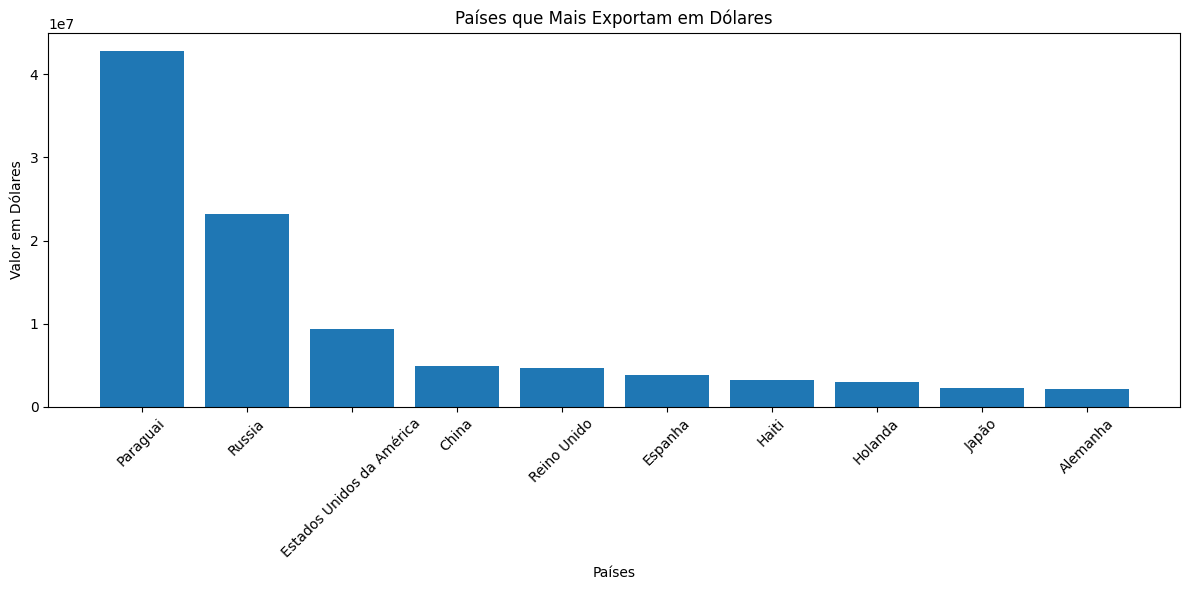

In [148]:
plt.figure(figsize=(12, 6))
plt.bar(paises_que_mais_exportam_dolar_top.index, paises_que_mais_exportam_dolar_top['Valor Dolar'])
plt.xlabel('Países')
plt.ylabel('Valor em Dólares')
plt.title('Países que Mais Exportam em Dólares')
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

In [135]:
#gráfico muito bom e prático de se fazer, porém por ser intuitivo, não será possivel a visualização pelo Github. Para tanto, será usada outras bibliotecas no notebook para isso.
import plotly.express as px

px.bar(paises_que_mais_exportam_dolar_top['Valor Dolar'])

In [ ]:
vinhos_mesa_top_exp_em_dolar = paises_que_mais_exportam_dolar.to_excel('vinhos_mesa_top_exp_em_dolar.xlsx')

In [149]:
#top em quantidade de litros

paises_que_mais_exportam_litros = dataset_final.groupby(by=['Pais'])[['Quantidade em litros exportado', 'Valor Dolar']].sum().sort_values(by=['Quantidade em litros exportado'], ascending = False)



paises_que_mais_exportam_litros

,Quantidade em litros exportado,Valor Dolar
Pais,,
Russia,32822141,23151716
Paraguai,30803247,42862206
Estados Unidos da América,3349299,9309051
China,2574686,4903695
Haiti,2351228,3198849
...,...,...
Porto Rico,0,0
Costa Rica,0,0
Costa do Marfim,0,0


In [150]:
paises_que_mais_exportam_litros_top = paises_que_mais_exportam_litros[:10]

In [151]:
top_paises_que_mais_exportam_litros = paises_que_mais_exportam_litros_top.to_excel('top_paises_que_mais_exportam_litros.xlsx')

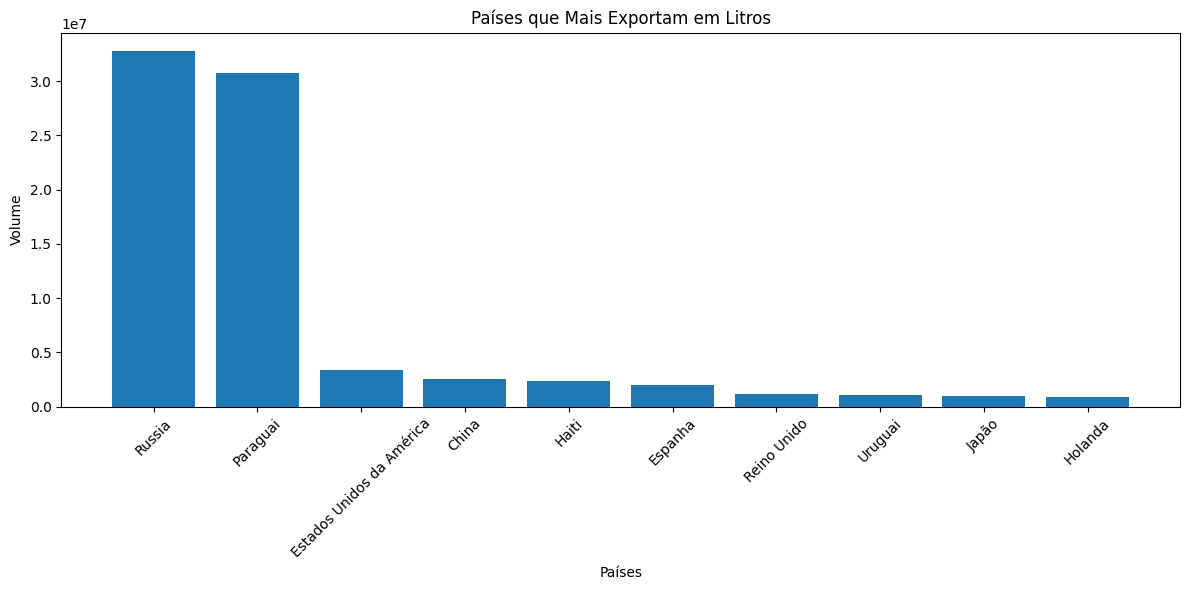

In [153]:
plt.figure(figsize=(12, 6))
plt.bar(paises_que_mais_exportam_litros_top.index, paises_que_mais_exportam_litros_top['Quantidade em litros exportado'])
plt.xlabel('Países')
plt.ylabel('Volume')
plt.title('Países que Mais Exportam em Litros')
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

In [152]:
px.bar(paises_que_mais_exportam_litros_top['Quantidade em litros exportado'])

Visualizando o tipo de vinho espumantes


In [162]:
# filtrar dos anos de 2008 a 2022 e/ou tipo de espumante
dataset_espumantes = pd.read_excel('/content/Dataset_Exportacao_Espumantes_Tratado.xlsx')
dataset_espumantes


,País,Ano,Tipo,Valor_KG,Valor_Dolar
0,Africa do Sul,1970,Espumante,0,0
1,Alemanha,1970,Espumante,0,0
2,Angola,1970,Espumante,0,0
3,Antigua e Barbuda,1970,Espumante,0,0
4,Antilhas Holandesas,1970,Espumante,0,0
...,...,...,...,...,...
5773,Uruguai,2023,Espumante,2812,14352
5774,Vanuatu,2023,Espumante,0,0
5775,Venezuela,2023,Espumante,0,0
5776,Vietnã,2023,Espumante,0,0


In [163]:
dataset_espumantes = dataset_espumantes.query('Ano >=2009')


In [164]:
dataset_espumantes.head()

,País,Ano,Tipo,Valor_KG,Valor_Dolar
4173,Africa do Sul,2009,Espumante,0,0
4174,Alemanha,2009,Espumante,6648,29018
4175,Angola,2009,Espumante,11393,33664
4176,Antigua e Barbuda,2009,Espumante,0,0
4177,Antilhas Holandesas,2009,Espumante,180,1660


In [165]:
dataset_espumantes = dataset_espumantes.rename(columns={'País':'Pais','Valor_KG':'Quantidade em litros exportado', 'Valor_Dolar': 'Valor Dolar'})
dataset_espumantes

,Pais,Ano,Tipo,Quantidade em litros exportado,Valor Dolar
4173,Africa do Sul,2009,Espumante,0,0
4174,Alemanha,2009,Espumante,6648,29018
4175,Angola,2009,Espumante,11393,33664
4176,Antigua e Barbuda,2009,Espumante,0,0
4177,Antilhas Holandesas,2009,Espumante,180,1660
...,...,...,...,...,...
5773,Uruguai,2023,Espumante,2812,14352
5774,Vanuatu,2023,Espumante,0,0
5775,Venezuela,2023,Espumante,0,0
5776,Vietnã,2023,Espumante,0,0


In [166]:
paises_que_mais_exportam_emdolar_espumantes = dataset_espumantes.groupby(by=['Pais'])[['Quantidade em litros exportado', 'Valor Dolar']].sum().sort_values(by=['Valor Dolar'], ascending = False)

paises_que_mais_exportam_emdolar_espumantes.reset_index() # 5 países que mais exportam vinho brasileiro

,Pais,Quantidade em litros exportado,Valor Dolar
0,Estados Unidos da América,3388562,9788986
1,Paraguai,596129,1680233
2,Reino Unido,339837,1589727
3,Angola,213033,1226906
4,Belgica,130573,624956
...,...,...,...
96,Guine-Bissau,0,0
97,Bulgaria,0,0
98,Iraque,0,0
99,Republica Dominicana,0,0


In [167]:
paises_que_mais_exportam_emdolar_espumantes_top10 = paises_que_mais_exportam_emdolar_espumantes[:10]

In [168]:
px.bar(paises_que_mais_exportam_emdolar_espumantes_top10['Valor Dolar'])

In [170]:
px.bar(paises_que_mais_exportam_emdolar_espumantes_top10['Quantidade em litros exportado'])

In [172]:
# com as 2 informações

paises_que_mais_exportam_espumantes = dataset_espumantes.groupby(by=['Pais'])[['Quantidade em litros exportado', 'Valor Dolar']].sum().sort_values(by=['Valor Dolar'], ascending = False)

paises_que_mais_exportam_espumantes.head() # 5 países que mais exportam vinho brasileiro

,Quantidade em litros exportado,Valor Dolar
Pais,,
Estados Unidos da América,3388562,9788986
Paraguai,596129,1680233
Reino Unido,339837,1589727
Angola,213033,1226906
Belgica,130573,624956


In [173]:
paises_que_mais_exportam_espumantes = paises_que_mais_exportam_espumantes[:10]

In [175]:
px.bar(paises_que_mais_exportam_espumantes[['Quantidade em litros exportado', 'Valor Dolar']], barmode='group')

Trabalhando com os derivados

Suco de Uva

In [176]:

suco_derivados= pd.read_excel('/content/Dataset_Exportacao_Suco_dUva_Tratado.xlsx')

In [177]:
suco_derivados = suco_derivados.query('Ano >=2009')

In [178]:
suco_derivados.head()

,Pais,Ano,Tipo,Valor_KG,Valor_Dolar
4914,Africa do Sul,2009,Suco de uva,0,0
4915,Alemanha,2009,Suco de uva,0,0
4916,Angola,2009,Suco de uva,237494,191270
4917,Antigua e Barbuda,2009,Suco de uva,0,0
4918,Antilhas Holandesas,2009,Suco de uva,0,0


In [179]:
paises_que_mais_exportam_emdolar_suco = suco_derivados.groupby(by=['Pais'])[['Valor_KG', 'Valor_Dolar']].sum().sort_values(by=['Valor_Dolar'], ascending = False)


In [180]:
paises_que_mais_exportam_emdolar_suco = paises_que_mais_exportam_emdolar_suco[:10]

In [182]:
px.bar(paises_que_mais_exportam_emdolar_suco[['Valor_KG', 'Valor_Dolar']], barmode='group')


In [183]:
px.bar(paises_que_mais_exportam_emdolar_suco['Valor_Dolar'])

In [184]:
px.bar(paises_que_mais_exportam_emdolar_suco['Valor_KG'])

Uva Fresca

In [185]:
dataset_uvas = pd.read_excel('/content/Dataset_Exportacao_Uvas_Tratado.xlsx')

In [186]:
dataset_uvas = dataset_uvas.query('Ano >=2008')



In [187]:
dataset_uvas.head()

,Pais,Ano,Tipo,Valor_KG,Valor_Dolar
2182,Africa do Sul,2008,Uvas frescas,0.0,0.0
2183,Alemanha,2008,Uvas frescas,1297991.0,2693071.0
2184,Angola,2008,Uvas frescas,33860.0,90396.0
2185,Antigua e Barbuda,2008,Uvas frescas,0.0,0.0
2186,Arabia Saudita,2008,Uvas frescas,47328.0,103666.0


In [188]:
paises_que_mais_exportam_emdolar_uva = dataset_uvas.groupby(by=['Pais'])[['Valor_KG', 'Valor_Dolar']].sum().sort_values(by=['Valor_Dolar'], ascending = False)


In [189]:
paises_que_mais_exportam_emdolar_uva = paises_que_mais_exportam_emdolar_uva[:10]

In [190]:
paises_que_mais_exportam_emdolar_uva

,Valor_KG,Valor_Dolar
Pais,,
Holanda,335276228.0,700292792.0
Reino Unido,142196859.0,333294892.0
Estados Unidos da América,134606136.0,331913606.0
Romênia,13194830.0,28569808.0
Noruega,10307652.0,28101860.0
Alemanha,12344201.0,25475471.0
Espanha,11575616.0,22011545.0
Emirados Arabes Unidos,7203263.0,18637908.0
Irlanda,7203905.0,17706802.0


In [192]:
px.bar(paises_que_mais_exportam_emdolar_uva[['Valor_KG', 'Valor_Dolar']], barmode='group')


In [193]:
px.bar(paises_que_mais_exportam_emdolar_uva['Valor_Dolar'])

In [194]:
px.bar(paises_que_mais_exportam_emdolar_uva['Valor_KG'])

Trabalho feito por **Jhonny Amorim**
Challenge da Fiap - Pós Graduação em *Data Analytics*